### **Code Testing Notebook**

In [9]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_tavily import TavilySearch
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display
from typing import TypedDict
from typing_extensions import Annotated
from langgraph.checkpoint.memory import MemorySaver


load_dotenv()
# os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
# coingecko_key = os.getenv("COINGECKO_API_KEY")

True

In [10]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)
llm = ChatGroq(model="openai/gpt-oss-120b")
tavily = TavilySearch(max_results=2)
tools = [tavily]
memory = MemorySaver()

In [ ]:
def bot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("bot_node", bot)
graph_builder.add_node("tools", ToolNode(tools))

graph_builder.add_edge(START, "bot_node")
graph_builder.add_conditional_edges(
    "bot_node",
    tools_condition
)
graph_builder.add_edge("tools", "bot_node")

graph = graph_builder.compile(checkpointer=memory)


In [26]:
config = {"configurable": {"thread_id": "1"}}

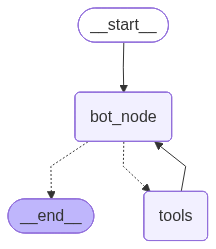

In [21]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:

q = "what's my dad's name?"
r = graph.invoke({"messages": q}, config=config)
print(r["messages"][-1].content)

Your dad’s name is **Enyioazu**.
